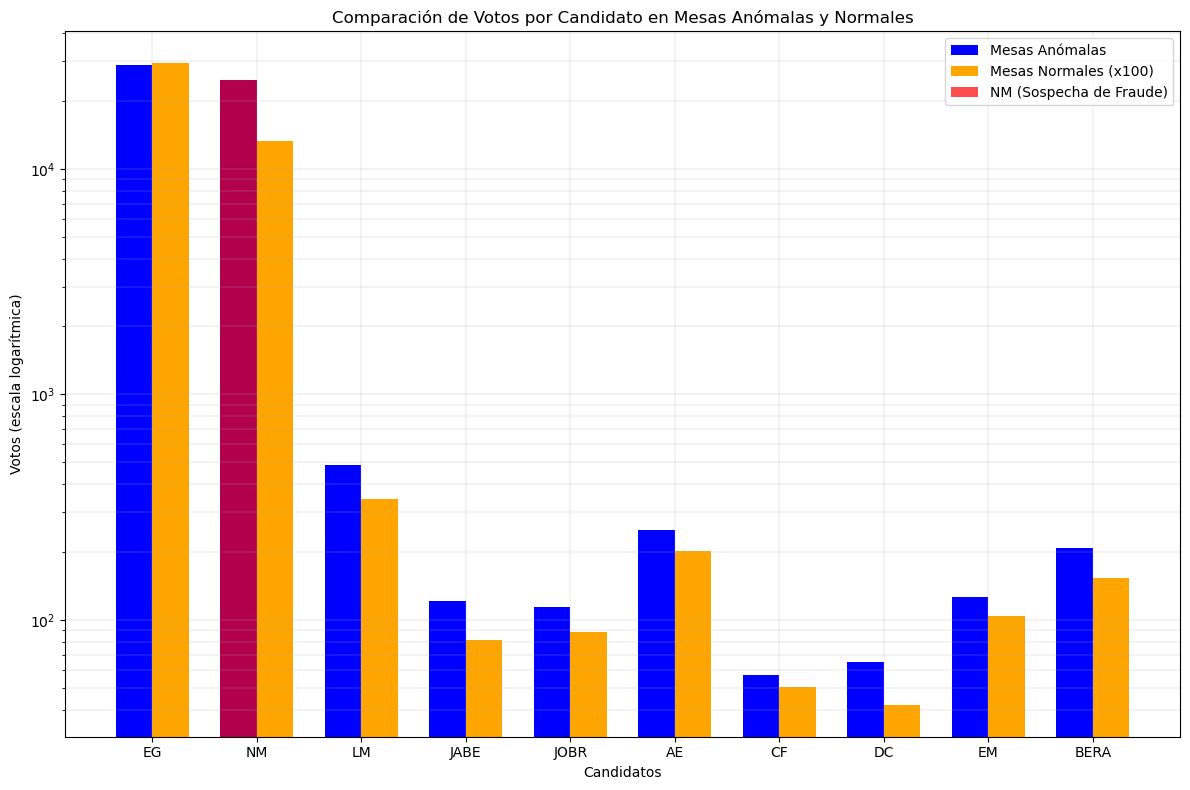

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Cargar los datos
file_path = 'RESULTADOS_2024_CSV_V1.csv'
datos_electorales = pd.read_csv(file_path)

# Calcular el porcentaje de participación
datos_electorales['Porcentaje_Participacion'] = (datos_electorales['VOTOS_VALIDOS'] / datos_electorales['RE']) * 100

# Calcular el z-score de la participación
datos_electorales['Z_Score_Participacion'] = np.abs(stats.zscore(datos_electorales['Porcentaje_Participacion']))

# Definir un umbral para identificar anomalías
umbral_z_score = 3
mesas_anomalas = datos_electorales[datos_electorales['Z_Score_Participacion'] > umbral_z_score]
mesas_normales = datos_electorales[datos_electorales['Z_Score_Participacion'] <= umbral_z_score]

# Sumar y promediar votos por candidato
votos_candidatos_anomalas = mesas_anomalas[['EG', 'NM', 'LM', 'JABE', 'JOBR', 'AE', 'CF', 'DC', 'EM', 'BERA']].sum()
votos_candidatos_normales = mesas_normales[['EG', 'NM', 'LM', 'JABE', 'JOBR', 'AE', 'CF', 'DC', 'EM', 'BERA']].mean()

# Configuración del gráfico
plt.figure(figsize=(12, 8))
x = np.arange(len(votos_candidatos_anomalas))  # posiciones del eje x
width = 0.35  # ancho de las barras

# Barras para mesas anómalas
plt.bar(x - width/2, votos_candidatos_anomalas, width, label='Mesas Anómalas', color='blue')

# Barras para mesas normales, escaladas para comparación
plt.bar(x + width/2, votos_candidatos_normales * 100, width, label='Mesas Normales (x100)', color='orange')

# Destacar al candidato NM
plt.bar(x[1] - width/2, votos_candidatos_anomalas[1], width, color='red', alpha=0.7, label='NM (Sospecha de Fraude)')

# Añadir etiquetas, título y configurar ejes
plt.ylabel('Votos (escala logarítmica)')
plt.title('Comparación de Votos por Candidato en Mesas Anómalas y Normales')
plt.xticks(x, votos_candidatos_anomalas.index)
plt.yscale('log')
plt.xlabel('Candidatos')
plt.legend()

# Añadir grillas y anotaciones si es necesario
plt.grid(True, which='both', linestyle='-', linewidth=0.2)
plt.tight_layout()

# Mostrar gráfico
plt.show()
